In [1]:
!pip install scikit-learn pandas matplotlib seaborn

In [6]:
# --- Import Library ---
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
data = "amazon.csv"
df = pd.read_csv(data)

In [8]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           932 non-null    object 
 1   product_name         932 non-null    object 
 2   category             932 non-null    object 
 3   discounted_price     932 non-null    object 
 4   actual_price         932 non-null    object 
 5   discount_percentage  932 non-null    object 
 6   rating               932 non-null    float64
 7   rating_count         930 non-null    object 
 8   about_product        932 non-null    object 
 9   user_id              932 non-null    object 
 10  user_name            932 non-null    object 
 11  review_id            932 non-null    object 
 12  review_title         932 non-null    object 
 13  review_content       932 non-null    object 
 14  img_link             932 non-null    object 
 15  product_link         932 non-null    obj

In [10]:
# Bersihkan kolom harga jadi numerik
def clean_price(price_str):
    if isinstance(price_str, str):
        return float(re.sub(r'[^\d.]', '', price_str).replace(',', '') or 0)
    return 0

df['discounted_price'] = df['discounted_price'].apply(clean_price)
df['actual_price'] = df['actual_price'].apply(clean_price)


In [11]:
# Bersihkan kolom rating
def clean_rating(rating_str):
    try:
        return float(rating_str)
    except:
        return np.nan

df['rating'] = df['rating'].apply(clean_rating)

In [12]:
# Bersihkan rating_count
def clean_count(count_str):
    if isinstance(count_str, str):
        return int(count_str.replace(',', '').strip())
    return 0

df['rating_count'] = df['rating_count'].apply(clean_count)


In [13]:
# Ambil kolom penting
df_reviews = df[['product_id', 'product_name', 'category', 'rating', 'review_content']].copy()

In [14]:
# Buat label sentimen berdasarkan rating
def label_sentiment(rating):
    if pd.isna(rating):
        return None
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df_reviews['sentiment'] = df_reviews['rating'].apply(label_sentiment)

In [15]:
# Hapus data kosong
df_reviews = df_reviews.dropna(subset=['review_content', 'sentiment']).reset_index(drop=True)

print("Contoh data setelah preprocessing:")
print(df_reviews.head())

Contoh data setelah preprocessing:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  rating  \
0  Computers&Accessories|Accessories&Peripherals|...     4.2   
1  Computers&Accessories|Accessories&Peripherals|...     4.0   
2  Computers&Accessories|Accessories&Peripherals|...     3.9   
3  Computers&Accessories|Accessories&Peripherals|...     4.2   
4  Computers&Accessories|Accessories&Peripherals|...     4.2   

                                      review_content sentiment  
0  Looks durable Charging is fine tooNo complains...  positive  
1  I ordered this cable to connect my pho

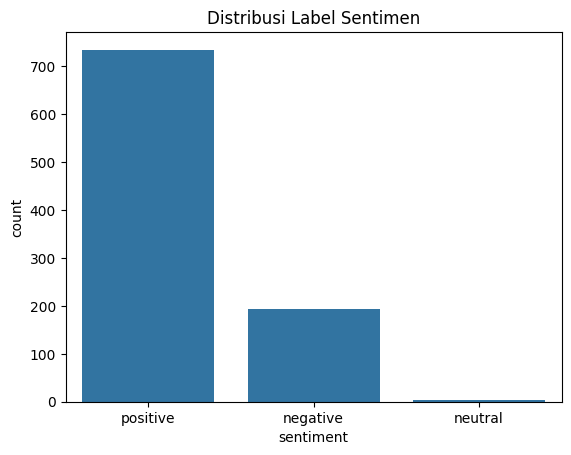

In [16]:
# --- EDA (Exploratory Data Analysis) ---
sns.countplot(x=df_reviews['sentiment'])
plt.title("Distribusi Label Sentimen")
plt.show()

In [17]:
# --- TF-IDF Vectorizer ---
X = df_reviews['review_content']
y = df_reviews['sentiment']

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [18]:
# --- Train Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# --- Train Model Logistic Regression ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)


Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.18      0.30        39
     neutral       0.00      0.00      0.00         1
    positive       0.82      0.99      0.90       147

    accuracy                           0.82       187
   macro avg       0.56      0.39      0.40       187
weighted avg       0.82      0.82      0.77       187



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


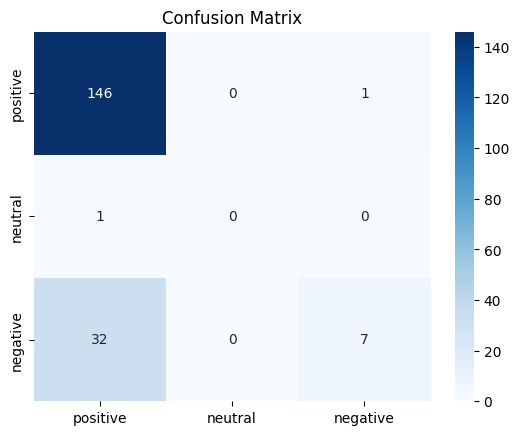

In [19]:
# --- Evaluate Model ---
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=["positive", "neutral", "negative"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive","neutral","negative"],
            yticklabels=["positive","neutral","negative"])
plt.title("Confusion Matrix")
plt.show()

In [20]:
!pip install --upgrade replicate langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [21]:
from google.colab import userdata

#ambil token dari secret
api_token = userdata.get('api_token')

# import libraray
import os

os.environ["REPLICATE_API_TOKEN"] = api_token

In [22]:
from langchain_community.llms import Replicate

# Define llm ibm-granite
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs={"temperature":0.2, "max_new_tokens":512}
)

In [23]:
# --- Contoh 1: Summarization ---
review_text = "The cable is durable and charges fast, but it stopped working after 2 months."
prompt = f"Classify the sentiment (positive, neutral, negative) and summarize in one sentence:\n\n{review_text}"

result = llm.invoke(prompt)
print("Granite Output:", result)

Granite Output: Sentiment: Negative. Summary: Despite its quick charging and durability, the cable's functionality ceased after only two months of use.


In [26]:
# --- Contoh 2: Sentiment Classification ---
sample_reviews = df_reviews['review_content'].sample(1, random_state=42).iloc[0]
prompt2 = f"Classify the sentiment of this review as positive, neutral, or negative:\n\n{sample_reviews}"
sentiment = llm.invoke(prompt2)
print("\n Sentiment Classification Example:")
print(sentiment)


 Sentiment Classification Example:
The sentiment of this review is positive. The user expresses satisfaction with the product's appearance, functionality, and value for money. They mention that the cable works well and is suitable for laptop charging. Although they haven't had the product long enough to comment on durability, their current experience is positive, and they plan to provide an update on durability after further use. The review contains several positive descriptors such as "good," "fine," "perfect," and "thankful," indicating a favorable opinion of the product.


In [27]:
# ambil 5 review dari dataset untuk uji coba Granite
sample_reviews = df_reviews['review_content'].sample(5, random_state=42).tolist()

for i, review in enumerate(sample_reviews, 1):
    prompt = f"Classify the sentiment (positive, neutral, negative) and summarize in one sentence:\n\n{review}"
    result = llm.invoke(prompt)
    print(f"\nReview {i}: {review[:100]}...")
    print("Granite Output:", result)


Review 1: The cable looks exactly as it is shown in the picture. I can't say about durability of this product ...
Granite Output: Sentiment: Positive
Summary: The user expresses satisfaction with the cable's appearance, functionality, and affordability, noting that it works well for laptop charging and was delivered promptly, planning to update on durability after further use.

Review 2: It worked well for some days later it is not working , I want it to replace.,Nice,Superb product wit...
Granite Output: The sentiment is overwhelmingly positive. The user praises the durability, fast charging capability, and premium feel of the USB-C to C cable, recommending it highly after using it for several weeks. The summary: This USB-C to C cable is lauded for its robust build, fast charging, and authenticity verification feature, receiving a strong recommendation from the user.

Review 3: Everything is good as I've used like a lot of earbudss nd this one i found is quite ammusing.....lik...
Gra

In [28]:
sample_reviews = df_reviews.sample(10, random_state=42).reset_index(drop=True)

# Prediksi dengan ML baseline (gunakan model yg sudah fit sebelumnya)
ml_preds = model.predict(vectorizer.transform(sample_reviews['review_content']))

comparison_df = pd.DataFrame({
    "Review": sample_reviews['review_content'].str[:120] + "...",
    "ML_Baseline": ml_preds,
    "Granite_Output": None
})

# --- 2. Prediksi dengan IBM Granite ---
for i, review in enumerate(sample_reviews['review_content']):
    prompt = f"Classify the sentiment (positive, neutral, negative) and summarize in one sentence:\n\n{review}"
    result = llm.invoke(prompt)
    comparison_df.loc[i, "Granite_Output"] = result


from IPython.display import display
pd.set_option('display.max_colwidth', 200)

print("🔎 Perbandingan Hasil ML Baseline vs IBM Granite (10 Review Acak)")
display(comparison_df)


🔎 Perbandingan Hasil ML Baseline vs IBM Granite (10 Review Acak)


,Review,ML_Baseline,Granite_Output
0,The cable looks exactly as it is shown in the picture. I can't say about durability of this product because I have purch...,positive,"Sentiment: Positive\n\nSummary: The user expresses satisfaction with the cable's appearance, functionality, and affordability, noting it works well for laptop charging and was delivered promptly, ..."
1,"It worked well for some days later it is not working , I want it to replace.,Nice,Superb product with white lights at bo...",positive,"The sentiment is overwhelmingly positive. The user initially expresses satisfaction with the product's performance, noting its durability, fast charging capability, and premium appearance. They re..."
2,Everything is good as I've used like a lot of earbudss nd this one i found is quite ammusing.....like i didn't get the n...,negative,"The sentiment is predominantly positive, with some minor criticisms. The user finds the earbuds amusing, appreciates the good bass quality, and considers it a good value for money. However, they e..."
3,"just a watch not smart one... all features are to make fool of you,Worst watch, connecting problem with phone nd autom...",negative,"The sentiments are mixed, with some users expressing dissatisfaction due to connectivity issues, poor battery life, and perceived deceptive features, while others praise the watch for its good qua..."
4,"https://m.media-amazon.com/images/I/6171Cw2IlPL._SY88.jpg,100% genuine and perfect product.,Good,Worth the money as its ...",positive,"The sentiment is predominantly positive, with users praising the product's authenticity, fun experience, good packaging, and nostalgic 80's picture effect. However, there are mixed reviews regardi..."
5,"Not value for money.. not satisfied,Good,Required Replacement but replaced one is Good,Good pairing and connectivity,Got...",negative,"The sentiment is mixed, with both positive and negative aspects. Overall, the product is deemed value for money despite initial dissatisfaction with a used remote, which was later replaced with a ..."
6,This is My first 5G IQOO mobile purchased on 26th December at Amazon. Till now i didnt feel anything bad in this mobile...,positive,"The sentiment is mixed, with a predominantly positive tone. The user expresses satisfaction with the phone's performance, smooth operation, and value for money, but disappointment with the camera ..."
7,About the TV - Wonderful---------------------------------------------------------------Probably the best TV in this pric...,positive,"**Sentiment:** Mixed (Positive about the TV's features and performance, Negative about the installation service and minor drawbacks)\n\n**Summary:** The TV is praised for its excellent picture qua..."
8,"I used this mobile Last 2months overall very good i am very satisfied buying this and no lag no heat you can go for it,N...",positive,"The sentiment is predominantly positive, with users expressing satisfaction with the phone's performance, design, and value for money. However, there are negative aspects mentioned, such as low vo..."
9,"Camera and display is very poor quality and battery 🔋 is very good nothing bad,Nice phone at reasonable price.,Good,NICE...",positive,"The overall sentiment is positive, as the user expresses satisfaction with the phone's battery life, its reasonable price, and describes it as good, nice, and offering value for money, despite men..."


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('ML_Baseline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ML_Baseline')):
  _plot_series(series, series_name, i)
  fig.legend(title='ML_Baseline', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['ML_Baseline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='index', y='ML_Baseline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

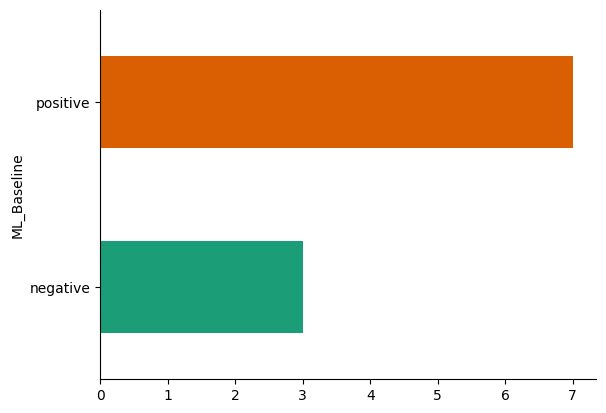

In [31]:
# @title ML_Baseline

from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('ML_Baseline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=comparison_df)

https://docs.google.com/spreadsheets/d/1LizkmzzJhirF6R-Z3UP5aX-gmgg3tSaV0zVfDG8kt_E/edit#gid=0


Akurasi ML Baseline: 1.0
Akurasi IBM Granite: 0.7


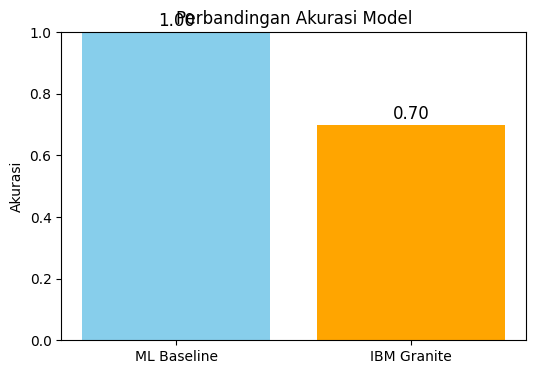

In [32]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

y_true = sample_reviews['sentiment'].tolist()

y_pred_ml = ml_preds

# --- Prediksi Granite ---
def extract_label(output):
    if not output:
        return "neutral"
    output = output.lower()
    if "positive" in output:
        return "positive"
    elif "negative" in output:
        return "negative"
    elif "neutral" in output:
        return "neutral"
    else:
        return "neutral"

y_pred_granite = [extract_label(x) for x in comparison_df['Granite_Output']]

acc_ml = accuracy_score(y_true, y_pred_ml)
acc_granite = accuracy_score(y_true, y_pred_granite)

print("Akurasi ML Baseline:", round(acc_ml, 3))
print("Akurasi IBM Granite:", round(acc_granite, 3))

plt.figure(figsize=(6,4))
plt.bar(["ML Baseline", "IBM Granite"], [acc_ml, acc_granite], color=['skyblue','orange'])
plt.ylim(0,1)
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
for i, acc in enumerate([acc_ml, acc_granite]):
    plt.text(i, acc+0.02, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()


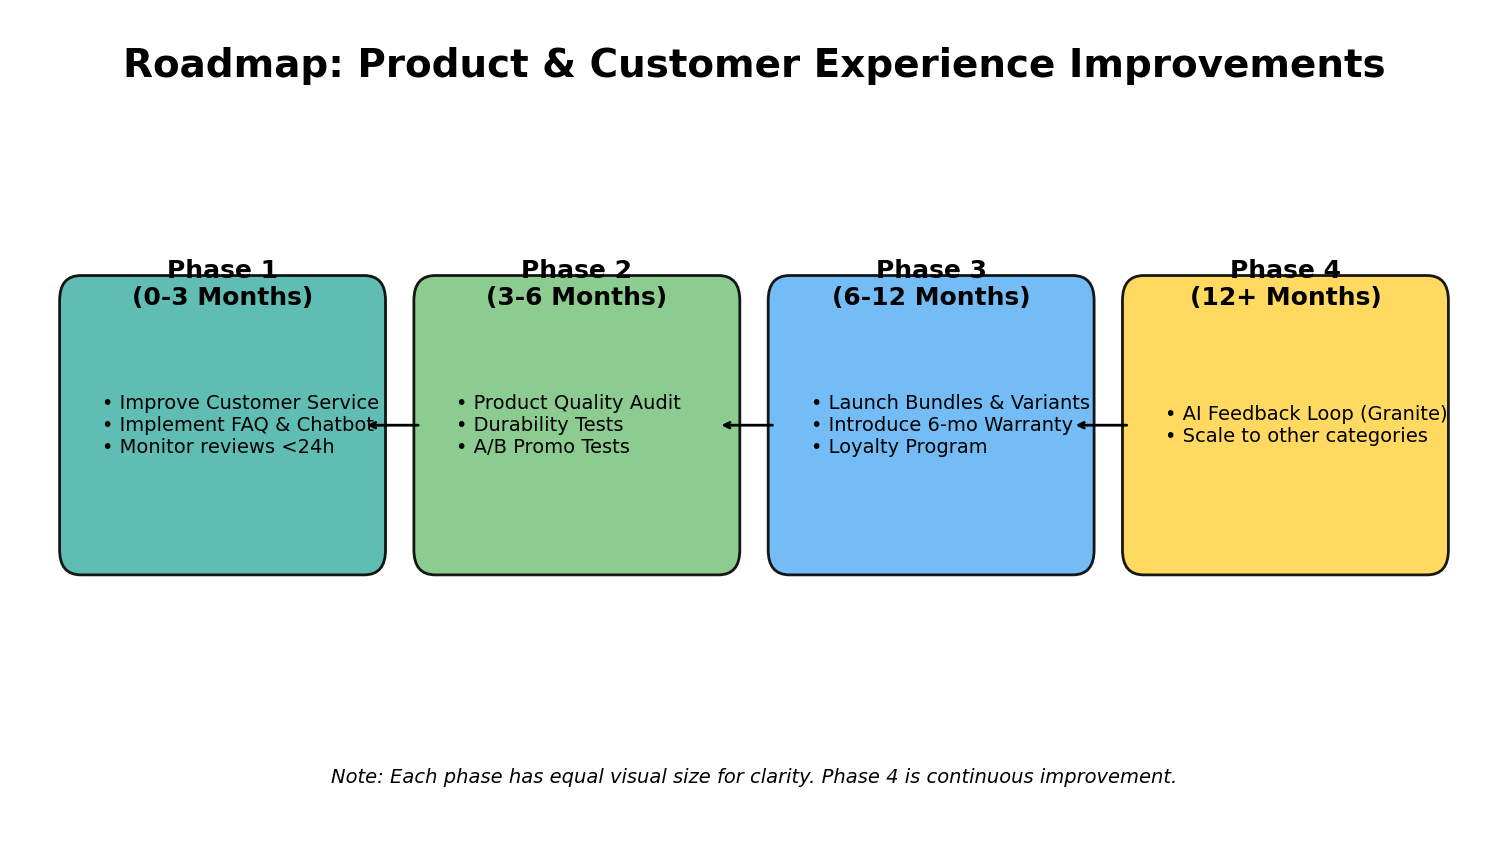

In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Roadmap phases and details
phases = [
    {"name": "Phase 1\n(0-3 Months)", "tasks": ["Improve Customer Service", "Implement FAQ & Chatbot", "Monitor reviews <24h"]},
    {"name": "Phase 2\n(3-6 Months)", "tasks": ["Product Quality Audit", "Durability Tests", "A/B Promo Tests"]},
    {"name": "Phase 3\n(6-12 Months)", "tasks": ["Launch Bundles & Variants", "Introduce 6-mo Warranty", "Loyalty Program"]},
    {"name": "Phase 4\n(12+ Months)", "tasks": ["AI Feedback Loop (Granite)", "Scale to other categories"]},
]

# Buat canvas 16:9 (slide ratio)
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_xlim(-1, 20)
ax.set_ylim(0, 10)
ax.axis('off')

y = 5  # posisi tengah (untuk box)

# Warna untuk tiap fase
colors = ["#4DB6AC", "#81C784", "#64B5F6", "#FFD54F"]

# Lebar box seragam
box_width = 4
spacing = 1

# Gambar tiap fase dengan ukuran sama
for i, ph in enumerate(phases):
    left = i * (box_width + spacing)
    rect = patches.FancyBboxPatch(
        (left, y-1.5), box_width, 3,
        boxstyle="round,pad=0.3", linewidth=2, edgecolor="black",
        facecolor=colors[i % len(colors)], alpha=0.9
    )
    ax.add_patch(rect)

    # Label nama fase
    ax.text(left + box_width/2, y+1.7, ph["name"],
            ha='center', va='center', fontsize=18, fontweight='bold')

    # Task list di dalam box
    task_text = "\n".join([f"• {t}" for t in ph["tasks"]])
    ax.text(left + 0.3, y, task_text,
            ha='left', va='center', fontsize=14, color="black")

    # Panah antar fase
    if i < len(phases)-1:
        ax.annotate("", xy=(left + box_width, y), xytext=(left + box_width + spacing - 0.2, y),
                    arrowprops=dict(arrowstyle="->", linewidth=2, color="black"))

# Judul dan catatan
ax.text(9.5, 9.2, "Roadmap: Product & Customer Experience Improvements",
        ha='center', fontsize=28, fontweight='bold')
ax.text(9.5, 0.7,
        "Note: Each phase has equal visual size for clarity. Phase 4 is continuous improvement.",
        ha='center', fontsize=14, style="italic")

# Simpan hasil sebagai PNG
plt.savefig("roadmap_timeline_no_line.png", bbox_inches='tight', dpi=100)
plt.show()
